In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 182s 3ms/step - loss: 0.2685 - acc: 0.9181 - val_loss: 0.0647 - val_acc: 0.9796
Epoch 2/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0886 - acc: 0.9735 - val_loss: 0.0517 - val_acc: 0.9840
Epoch 3/12
60000/60000 [==============================] - 175s 3ms/step - loss: 0.0681 - acc: 0.9796 - val_loss: 0.0335 - val_acc: 0.9883
Epoch 4/12
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0520 - acc: 0.9847 - val_loss: 0.0323 - val_acc: 0.9888
Epoch 5/12
60000/60000 [==============================] - 175s 3ms/step - loss: 0.0469 - acc: 0.9861 - val_loss: 0.0311 - val_acc: 0.9897
Epoch 6/12
60000/60000 [==============================] - 176s 3ms/step - 

CNN is consists of feature extraction and classification. Feature extraction can be done by alternating convolution layers with pooling layers. Classification is performed by dense layers followed by a final softmax layer in end.

## Convolution-Subsambling pairs

In [0]:
# Here we will use Convolution and maxpooling

In [0]:
# LOAD LIBRARIES
from __future__ import print_function
import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras import backend as K

# GLOBAL VARIABLES
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS

nets = 3
model = [0] *nets

for j in range(3):
  model[j] = Sequential()
  # First Layer of CONV2D and MAXPOOL2D
  model[j].add(Conv2D(24,kernel_size=5,padding='same',activation='relu', input_shape=input_shape))
  model[j].add(MaxPool2D())
  if j>0:
    # Second Layer of CONV2D and MAXPOOL2D
    model[j].add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
    model[j].add(MaxPool2D())
  if j>1:
    # Third Layer of CONV2D and MAXPOOL2D
    model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
    model[j].add(MaxPool2D(padding='same'))
  model[j].add(Flatten())
  model[j].add(Dense(256, activation='relu'))
  model[j].add(Dense(10, activation='softmax'))
  model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
# CREATE VALIDATION SET
from sklearn.model_selection import train_test_split
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(x_train, y_train, test_size = 0.333)
# TRAIN NETWORKS
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x+epochs))
history = [0] * nets
names = ["(C-P)x1","(C-P)x2","(C-P)x3"]
epochs = 20
for j in range(nets):
  history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
  print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

CNN (C-P)x1: Epochs=20, Train accuracy=0.99983, Validation accuracy=0.98759
CNN (C-P)x2: Epochs=20, Train accuracy=0.99985, Validation accuracy=0.99029
CNN (C-P)x3: Epochs=20, Train accuracy=0.99960, Validation accuracy=0.99114


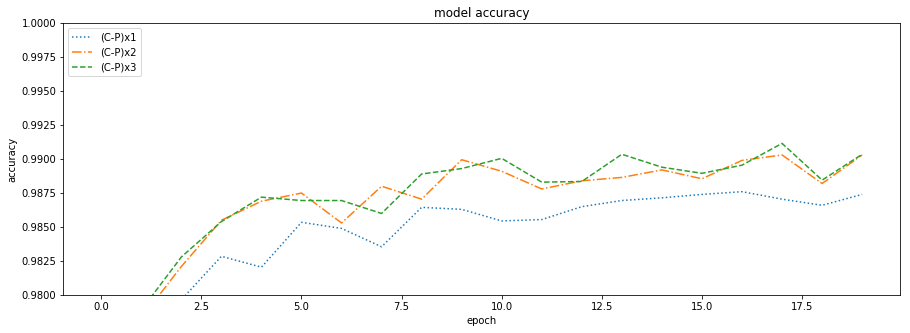

In [0]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

Summary

From the above experiment, it seems that 3 pairs of convolution-subsambling is slightly better than 2 pairs. However the improvement is not significantly very high so we can use either of them, so let's use 2.

## Number of Feature Maps

In [0]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 6
model = [0] *nets
for j in range(6):
  model[j] = Sequential()
  model[j].add(Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(28,28,1)))
  model[j].add(MaxPool2D())
  model[j].add(Conv2D(j*16+16,kernel_size=5,activation='relu'))
  model[j].add(MaxPool2D())
  model[j].add(Flatten())
  model[j].add(Dense(256, activation='relu'))
  model[j].add(Dense(10, activation='softmax'))
  model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [0]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(x_train, y_train, test_size = 0.333)
# TRAIN NETWORKS
history = [0] * nets
names = ["8 maps","16 maps","24 maps","32 maps","48 maps","64 maps"]
epochs = 20
for j in range(nets):
  history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
  print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))
  

CNN 8 maps: Epochs=20, Train accuracy=0.99670, Validation accuracy=0.98599
CNN 16 maps: Epochs=20, Train accuracy=0.99895, Validation accuracy=0.98749
CNN 24 maps: Epochs=20, Train accuracy=0.99930, Validation accuracy=0.98864
CNN 32 maps: Epochs=20, Train accuracy=0.99950, Validation accuracy=0.98944
CNN 48 maps: Epochs=20, Train accuracy=0.99983, Validation accuracy=0.99009
CNN 64 maps: Epochs=20, Train accuracy=0.99990, Validation accuracy=0.99059


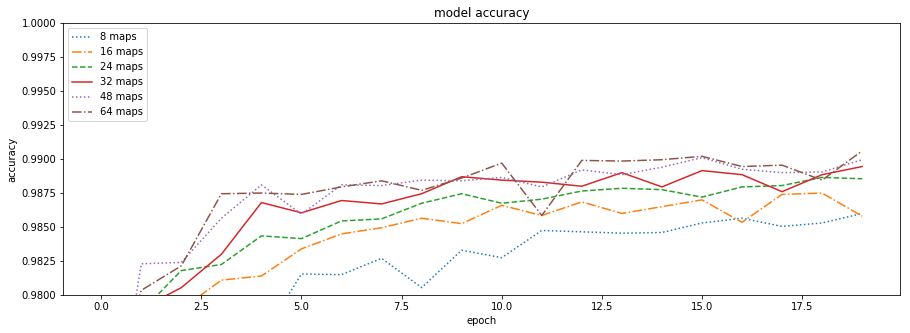

In [0]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
  plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

Summary:-->

From the above experiement, it appears that 32 maps in the first convolutional layer and 64 maps in the second convolutional layer is the best. Architectures with more maps only perform slightly better and are not worth the additonal computation cost.

## Dense layer

In [0]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(8):
  model[j] = Sequential()
  model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
  model[j].add(MaxPool2D())
  model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
  model[j].add(MaxPool2D())
  model[j].add(Flatten())
  if j>0:
    model[j].add(Dense(2**(j+4), activation='relu'))
  model[j].add(Dense(10, activation='softmax'))
  model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(x_train, y_train, test_size = 0.333)
# TRAIN NETWORKS
history = [0] * nets
names = ["0N","32N","64N","128N","256N","512N","1024N","2048N"]
epochs = 20
for j in range(nets):
  history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
  print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

CNN 0N: Epochs=20, Train accuracy=0.99675, Validation accuracy=0.98719
CNN 32N: Epochs=20, Train accuracy=0.99750, Validation accuracy=0.98774
CNN 64N: Epochs=20, Train accuracy=0.99885, Validation accuracy=0.98869
CNN 128N: Epochs=20, Train accuracy=0.99945, Validation accuracy=0.98964
CNN 256N: Epochs=20, Train accuracy=0.99978, Validation accuracy=0.98979
CNN 512N: Epochs=20, Train accuracy=0.99990, Validation accuracy=0.99044
CNN 1024N: Epochs=20, Train accuracy=0.99990, Validation accuracy=0.99104
CNN 2048N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99129


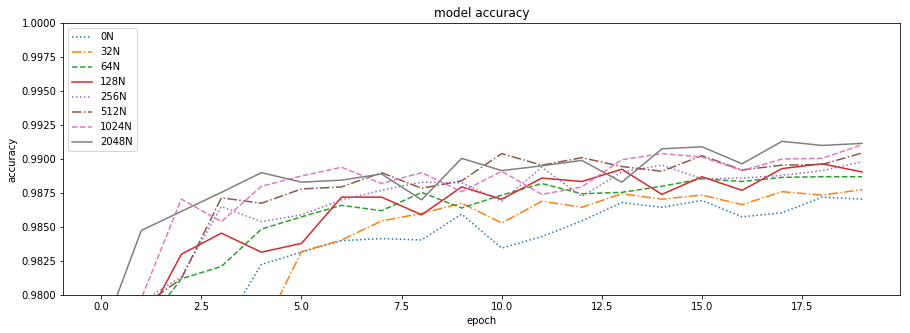

In [0]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
  plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

Summary:-->

From this experiment, it appears that 128 units is the best. Dense layers with more units only perform slightly better and are not worth the additional computational cost. (I also tested using two consecutive dense layers instead of one, but that showed no benefit over a single dense layer.)

## Checking Dropout

In [0]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(8):
  model[j] = Sequential()
  model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
  model[j].add(MaxPool2D())
  model[j].add(Dropout(j*0.1))
  model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
  model[j].add(MaxPool2D())
  model[j].add(Dropout(j*0.1))
  model[j].add(Flatten())
  model[j].add(Dense(128, activation='relu'))
  model[j].add(Dropout(j*0.1))
  model[j].add(Dense(10, activation='softmax'))
  model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
  

In [0]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(x_train, y_train, test_size = 0.333)
# TRAIN NETWORKS
history = [0] * nets
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
epochs = 30
for j in range(nets):
  history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
  print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))
  

CNN D=0: Epochs=30, Train accuracy=0.99953, Validation accuracy=0.98914
CNN D=0.1: Epochs=30, Train accuracy=0.99625, Validation accuracy=0.99069
CNN D=0.2: Epochs=30, Train accuracy=0.99348, Validation accuracy=0.99104
CNN D=0.3: Epochs=30, Train accuracy=0.99013, Validation accuracy=0.99129
CNN D=0.4: Epochs=30, Train accuracy=0.98653, Validation accuracy=0.99029
CNN D=0.5: Epochs=30, Train accuracy=0.97909, Validation accuracy=0.98914
CNN D=0.6: Epochs=30, Train accuracy=0.96889, Validation accuracy=0.98669
CNN D=0.7: Epochs=30, Train accuracy=0.94698, Validation accuracy=0.98088


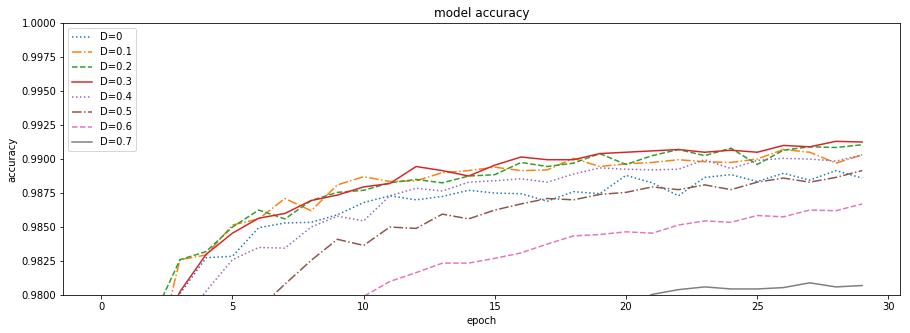

In [0]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
  plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

## Advanced features

Instead of using one convolution layer of size 5x5, we can mimic 5x5 by using two consecutive 3x3 layers and it will be more nonlinear. Instead of using a max pooling layer, we can subsample by using a convolution layer with strides=2. also check batch normalization & data augmentation, Let's test all four of these

* replace '32C5' with '32C3-32C3'
* replace 'P2' with '32C5S2'
* add batch normalization
* add data augmentation



In [0]:
# LOAD LIBRARIES
from __future__ import print_function
import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras import backend as K
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 5
model = [0] *nets

j=0
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=1
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=2
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=3
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
j=4
model[j] = Sequential()

model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))

model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))

model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))

model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
# CREATE VALIDATION SET

from sklearn.model_selection import train_test_split

X_train2, X_val2, Y_train2, Y_val2 = train_test_split(x_train, y_train, test_size = 0.2)
# TRAIN NETWORKS 1,2,3,4
history = [0] * nets
names = ["basic","32C3-32C3","32C5S2","both+BN","both+BN+DA"]
epochs = 35
for j in range(nets-1):
  history[j] = model[j].fit(X_train2,Y_train2, batch_size=64, epochs = epochs,validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
  print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

# CREATE MORE TRAINING IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator( rotation_range=10, zoom_range = 0.1, width_shift_range=0.1, height_shift_range=0.1)
# TRAIN NETWORK 5
j = nets-1
history[j] = model[j].fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64), epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,
    validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

Instructions for updating:
Use tf.cast instead.
CNN basic: Epochs=35, Train accuracy=0.99538, Validation accuracy=0.99625
CNN 32C3-32C3: Epochs=35, Train accuracy=0.99702, Validation accuracy=0.99600
CNN 32C5S2: Epochs=35, Train accuracy=0.99881, Validation accuracy=0.99575
CNN both+BN: Epochs=35, Train accuracy=0.99875, Validation accuracy=0.99600
CNN both+BN+DA: Epochs=35, Train accuracy=0.99562, Validation accuracy=0.99708


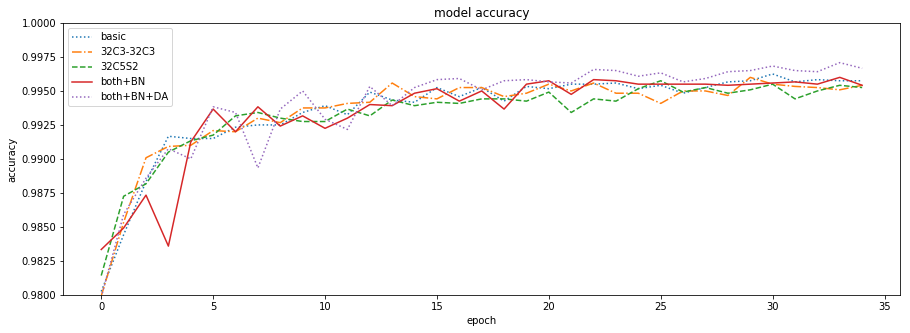

In [0]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
  plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

Summary;-->

From this experiment, we see that each of the four advanced features improve accuracy. The first model uses no advanced features. The last model have all three of those techniques plus data augmentation and achieves the best accuracy of around 99.5%.

### Conclusion



In [6]:
# Creating table using PrettyTable library
from prettytable import PrettyTable

print('CONVOLUTION & POOLING')
model_name1 = ['CNN (C-P)x1', 'CNN (C-P)x2', 'CNN (C-P)x3']
epochs1 = ['20','20','20']
train_acc1 = ['0.99983','0.99985','0.99960']
valid_acc1 = ['0.98759','0.99029','0.99114']
# Initializing prettytable
ptable1 = PrettyTable()
# Adding columns
ptable1.add_column("MODEL",model_name1)
ptable1.add_column("EPOCH",epochs1)
ptable1.add_column("TRAIN-ACCURACY",train_acc1)
ptable1.add_column("VALIDATION-ACC",valid_acc1)
# Printing the Table
print(ptable1)

print('NUMBER OF FEATURE MAP')
model_name2 = ['CNN 8maps', 'CNN 16maps', 'CNN 24maps', 'CNN 32maps','CNN 48maps', 'CNN 64maps']
epochs2 = ['20','20','20','20','20','20']
train_acc2 = ['0.99670','0.99895','0.99930','0.99950','0.99983','0.99990']
valid_acc2 = ['0.98599','0.98749','0.98864','0.98944','0.99009','0.99059']
# Initializing prettytable
ptable2 = PrettyTable()
# Adding columns
ptable2.add_column("MODEL",model_name2)
ptable2.add_column("EPOCH",epochs2)
ptable2.add_column("TRAIN-ACCURACY",train_acc2)
ptable2.add_column("VALIDATION-ACC",valid_acc2)
# Printing the Table
print(ptable2)

print('DENSE LAYER')
model_name3 = ['CNN 0N', 'CNN 32N', 'CNN 64N', 'CNN 128N','CNN 256N', 'CNN 512N', 'CNN 1024N', 'CNN 2048N']
epochs3 = ['20','20','20','20','20','20','20','20']
train_acc3 = ['0.99675','0.99750','0.99885','0.99945','0.99978','0.99990','0.99990','1']
valid_acc3 = ['0.98719','0.98774','0.98869','0.98964','0.98979','0.99044','0.99104','0.99129']
# Initializing prettytable
ptable3 = PrettyTable()
# Adding columns
ptable3.add_column("MODEL",model_name3)
ptable3.add_column("EPOCH",epochs3)
ptable3.add_column("TRAIN-ACCURACY",train_acc3)
ptable3.add_column("VALIDATION-ACC",valid_acc3)
# Printing the Table
print(ptable3)

print('DROPOUT')
model_name4 = ['CNN D=0', 'CNN D=0.1', 'CNN D=0.2', 'CNN D=0.3','CNN D=0.4', 'CNN D=0.5', 'CNN D=0.6', 'CNN D=0.7']
epochs4 = ['30','30','30','30','30','30','30','30']
train_acc4 = ['0.99953','0.99625','0.99348','0.99013','0.98653','0.97909','0.96889','0.94698']
valid_acc4 = ['0.98914','0.99069','0.99104','0.99129','0.99029','0.98914','0.98669','0.98088']
# Initializing prettytable
ptable4 = PrettyTable()
# Adding columns
ptable4.add_column("MODEL",model_name4)
ptable4.add_column("EPOCH",epochs4)
ptable4.add_column("TRAIN-ACCURACY",train_acc4)
ptable4.add_column("VALIDATION-ACC",valid_acc4)
# Printing the Table
print(ptable4)

print('ADVANCE FEATURES')
model_name5 = ['CNN basic', 'CNN 32C3-32C3', 'CNN 32C5S2', 'CNN both+BN','CNN both+BN+DA']
epochs5 = ['35','35','35','35','35']
train_acc5 = ['0.99538','0.99702','0.99881','0.99875','0.99562']
valid_acc5 = ['0.99625','0.99600','0.99575','0.99600','0.99708']
# Initializing prettytable
ptable5 = PrettyTable()
# Adding columns
ptable5.add_column("MODEL",model_name5)
ptable5.add_column("EPOCH",epochs5)
ptable5.add_column("TRAIN-ACCURACY",train_acc5)
ptable5.add_column("VALIDATION-ACC",valid_acc5)
# Printing the Table
print(ptable5)


CONVOLUTION & POOLING
+-------------+-------+----------------+----------------+
|    MODEL    | EPOCH | TRAIN-ACCURACY | VALIDATION-ACC |
+-------------+-------+----------------+----------------+
| CNN (C-P)x1 |   20  |    0.99983     |    0.98759     |
| CNN (C-P)x2 |   20  |    0.99985     |    0.99029     |
| CNN (C-P)x3 |   20  |    0.99960     |    0.99114     |
+-------------+-------+----------------+----------------+
NUMBER OF FEATURE MAP
+------------+-------+----------------+----------------+
|   MODEL    | EPOCH | TRAIN-ACCURACY | VALIDATION-ACC |
+------------+-------+----------------+----------------+
| CNN 8maps  |   20  |    0.99670     |    0.98599     |
| CNN 16maps |   20  |    0.99895     |    0.98749     |
| CNN 24maps |   20  |    0.99930     |    0.98864     |
| CNN 32maps |   20  |    0.99950     |    0.98944     |
| CNN 48maps |   20  |    0.99983     |    0.99009     |
| CNN 64maps |   20  |    0.99990     |    0.99059     |
+------------+-------+---------------